In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in file
1. Import the csv data into a table in a database on your machine. You can use SQL, workbench or python to achieve this. Show the process you did to achieve this.

In [3]:
df = pd.read_csv('all_weather_data.csv', delimiter=';' , index_col = 'index')

# Plotting time series
2. Plot a timeseries plot of selected variables for station FGBT and FMMI. For each station plot heat_index_set_1d together with air_temp_set_1 in one plot and wind_speed_set_1 together with wind_gust_set_1 on another. All in all, provide 4 plot images (2 for each station).

## Change Date_Time column to DateTime

In [6]:
df['Date_Time'] = df['Date_Time'].astype('datetime64')

In [4]:
df.set_index('Date_Time', inplace= True)

In [5]:
def plot_timeseries(stationID, feature_list):
    plt.figure(figsize= (8,4))
    plt.plot( df[feature_list[0]][df['Station_ID']== stationID ] , label= feature_list[0], alpha= 0.7 )
    plt.plot( df[feature_list[1]][df['Station_ID']== stationID ] , label=feature_list[1], alpha= 0.7)
    plt.title('Station-'+stationID)
    plt.xlabel('DateTime')
    plt.ylabel('Readings')
    plt.xticks( rotation=45)
    plt.grid(which='both', linestyle='--', linewidth='0.5', color='black')
    plt.tight_layout()
    plt.legend()
    plt.show()

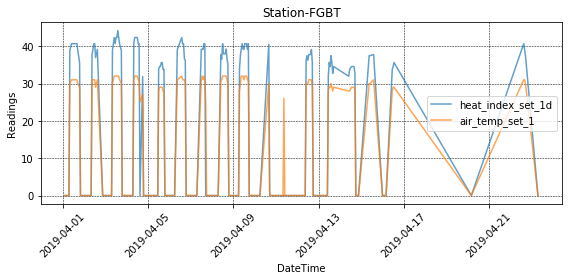

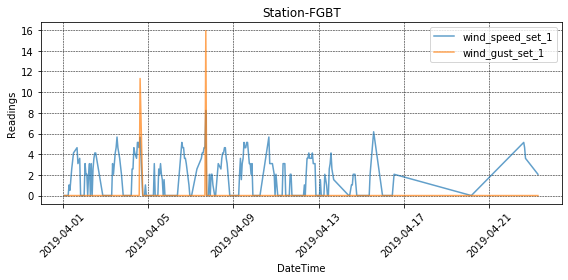

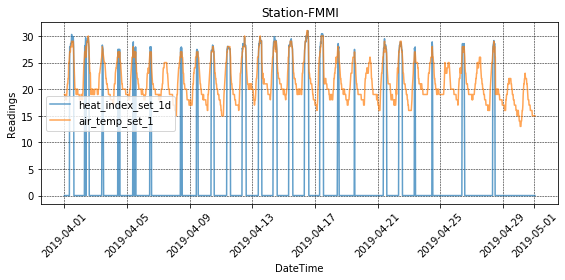

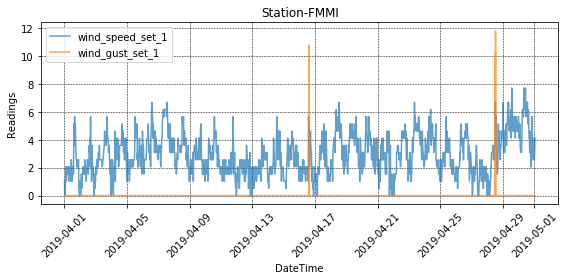

In [6]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plot_timeseries('FGBT', ['heat_index_set_1d','air_temp_set_1'] )
plot_timeseries('FGBT', ['wind_speed_set_1','wind_gust_set_1'] )
plot_timeseries('FMMI', ['heat_index_set_1d','air_temp_set_1'] )
plot_timeseries('FMMI', ['wind_speed_set_1','wind_gust_set_1'] )

# Create a SQL Query
3. Create a query that gives the name of all stations that have at least one row of values for heat_index_set_1d

## Using Pandasql

In [7]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
stations_df = pysqldf("SELECT DISTINCT Station_ID FROM df \
        WHERE heat_index_set_1d>0;") 

In [8]:
np.asarray( stations_df.Station_ID )

array(['DTTD', 'EPRZ', 'FAEL', 'FAPE', 'FGBT', 'FKKL', 'FMMI', 'FMMS',
       'FMMT', 'FOOG', 'FOOL', 'FTTJ', 'HDAM', 'LFYR', 'LZKZ', 'MMTC',
       'NZCH', 'OAKN', 'RKSM', 'RKSS', 'RKTN', 'SARF', 'SAZN', 'SBAR',
       'SBMO', 'SBRF', 'SGAS', 'SPCL', 'SPMS', 'SPST', 'UKLU', 'VIDP',
       'VIJP', 'VOPC', 'VOSM', 'VOTR', 'VTUO', 'VTUQ', 'VTUV', 'WIPP',
       'YAMB', 'YBBN', 'YBCG', 'ZBHH', 'ZSHC', 'ZSNB', 'ZSSS'],
      dtype=object)

# Missing values
4. Find columns that have more that have at least 90% values (not having more than 5% NULL values). The columns that have less then 10% missing values are to be used for analysis. You can choose to use SQL or Python. Show how you proceed and list the columns that have too many missing values.

In [9]:
df.isnull().sum()

Station_ID                           0
air_temp_set_1                       0
altimeter_set_1                      0
dew_point_temperature_set_1d         0
heat_index_set_1d                    0
pressure_set_1d                      0
relative_humidity_set_1              0
sea_level_pressure_set_1d            0
weather_cond_code_set_1              0
wind_cardinal_direction_set_1d    7880
wind_chill_set_1d                    0
wind_direction_set_1                 0
wind_gust_set_1                      0
wind_speed_set_1                     0
dtype: int64

**In addition, there are a number of columns with a lot of zeros. I will be considering the zeros as missing values as zero is very unlikely to be the actual measurement of these columns**

In [10]:
df.apply(  lambda x:  100-(sum(x==0 ) + x.isnull().sum())*100  /len( x )  )

Station_ID                        100.000000
air_temp_set_1                     97.994556
altimeter_set_1                    99.769887
dew_point_temperature_set_1d       99.343066
heat_index_set_1d                  16.846468
pressure_set_1d                    99.769887
relative_humidity_set_1            99.545961
sea_level_pressure_set_1d          99.500186
weather_cond_code_set_1            17.017197
wind_cardinal_direction_set_1d     90.251144
wind_chill_set_1d                   4.844736
wind_direction_set_1               84.827416
wind_gust_set_1                     6.731412
wind_speed_set_1                   91.552641
dtype: float64

In [11]:
good_columns = pd.DataFrame( df.apply(  lambda x:  100-(sum(x==0 ) + x.isnull().sum())*100  /len( x )  )
                            , columns=['Percent'] )

In [12]:
good_columns['Percent'] =   good_columns['Percent'].astype(float)
bad_columns_list = list( good_columns[ good_columns['Percent'] < 90].index )
good_columns_list = list( good_columns[ good_columns['Percent'] >= 90].index )

In [13]:
df_nonms  = df.drop ( columns=bad_columns_list )

# Questions 5
5. Create a view that shows only the columns that have more than 90% non-null values. This view should also remove all rows that have any null values. Provide the SQL code to create this view.

USE inf230exam; <br></br>

DROP VIEW IF EXISTS good_columns_and_rows; <br></br>
 <br></br>
-- Selecting only the list of good columns <br></br>
-- as discovered in pandas <br></br>
CREATE VIEW good_columns_and_rows  AS  <br></br>
SELECT  Station_ID ,    <br></br>
 air_temp_set_1  , <br></br> 
 altimeter_set_1   , <br></br> 
 dew_point_temperature_set_1d      , <br></br> 
 pressure_set_1d ,   <br></br> 
 relative_humidity_set_1   , <br></br> 
 sea_level_pressure_set_1d   , <br></br> 
 wind_cardinal_direction_set_1d   , <br></br> 
 wind_speed_set_1   <br></br> 
 FROM    all_weather_data  <br></br>
 
 -- filtering out rows that are null <br></br>
 
 WHERE 
 Station_ID  IS NOT NULL AND   
 air_temp_set_1   IS NOT NULL AND   
 altimeter_set_1    IS NOT NULL AND   
 dew_point_temperature_set_1d       IS NOT NULL AND   
 pressure_set_1d   IS NOT NULL AND   
 relative_humidity_set_1    IS NOT NULL AND   
 sea_level_pressure_set_1d    IS NOT NULL AND   
 wind_cardinal_direction_set_1d    IS NOT NULL AND   
 wind_speed_set_1    IS NOT NULL

# Question 6
6. The data we have in its current for is not normalized and therefore contains a lot of redundant data. Create a normalized model. Provide an image of the model and an explanation for which variables broke what normalization requirement.

1. The table is already in 1st normal form, as there are no two columns that hold the same measurement.
2. The primary key is the combination of Station_ID and Date_Time. Since every measurement is dependant on both of the primary keys and not only one of them. The table is in second normal form too. There are no transitive dependencies. 
    - However, the index column will be used as primary key in all of the tables.
    - Index, Date_Time and Station_ID will be a separate table.
3. For third normal form, one of the columns should not be directly dependant on the others. 
    - Dew point depends on relative humidity and temperature, so we can take that out to another table. Td = T - ((100 - RH)/5.) where Td is dew point temperature (in degrees Celsius), T is observed temperature (in degrees Celsius), and RH is relative humidity (in percent).  
    - Altimeter, Pressure, sea level pressure could also be separated. Will keep just the Pressure column in original table.
    - Wind cardinal direction can be taken out as there is a more detailed wind direction.
    - Wind chill will be taken out too as it can be calculated from other variables.
    - weather_cond_code_set_1 is also a calculated variable from others, so that is taken out to another table.

![](Broken_down.png)

# PCA

In [14]:
clean_data = pysqldf("""
SELECT  
*   
FROM    df_nonms 
 WHERE 
 Station_ID  IS NOT NULL AND  
 air_temp_set_1   IS NOT NULL AND   
 altimeter_set_1    IS NOT NULL AND   
 dew_point_temperature_set_1d       IS NOT NULL AND  
 pressure_set_1d   IS NOT NULL AND 
 relative_humidity_set_1    IS NOT NULL AND 
 sea_level_pressure_set_1d    IS NOT NULL AND 
 wind_cardinal_direction_set_1d    IS NOT NULL AND 
 wind_speed_set_1    IS NOT NULL;""") 

## It seems we need Station metadata, to know their location
- First I imported the data from mesonet. It seems I exceeded my free usage in the process. So I'm using a file stored as the json input here

In [16]:
url="https://api.synopticdata.com/v2/stations/metadata?&token=9da9007e905e45f7b8b575c452e860d1&stid=BIAR, BIRK, BIVM, CYND, CYOJ, D3735, DTTD, EDDV, EDVE, EGNH, EGNM, EGNO, ENGM, ENRO, ENSB, ENVA, EPRZ, ETHC, FAEL, FAPE, FGBT, FKKL, FMMI, FMMS, FMMT, FOOG, FOOL, FTTJ, HDAM, LEGT, LEMD, LEVS, LFOC, LFOJ, LFYR, LZKZ, MMTC, NZCH, NZWN, OAKN, PAIM, RJSF, RJSN, RJTU, RKPK, RKSM, RKSS, RKTN, SARF, SAZN, SBAR, SBMO, SBRF, SGAS, SPCL, SPMS , SPST, UACC, UAKK, UKDD, UKDE, UKHH, UKLU, UUBW, UUDD, UUMO, VIDP, VIJP, VOPC, VOSM, VOTR, VTUO, VTUQ    , VTUV, WIPP, YAMB, YBBN, YBCG, ZBHH, ZSHC, ZSNB, ZSSS"

In [18]:
# import requests
# json_data = requests.get(url)
# json_data.text

In [19]:
file = open("station_metadata.json", "r")
contents = file.read()
file.close()
type( contents)

str

In [20]:
import json
js = json.loads(contents)

In [21]:
df_stations = pd.DataFrame( js['STATION'])

## Trying to put numerical values to the wind direction variable
- Decided to drop the column as it has less than 90% data

In [22]:
# pysqldf(""" SELECT distinct wind_cardinal_direction_set_1d --, wind_direction_set_1
# FROM df_nonms
# limit 100 ; """ )

In [23]:
df_nonms = df_nonms.drop ( columns='wind_cardinal_direction_set_1d' )

## Taking a average for each weather station makes better sense, before creating a PCA

In [24]:
avg_df = df_nonms.groupby('Station_ID').mean()

- Plotting the original variables shows that Dew Point temperature and air temperature showed good correlation, while others do not show structure.

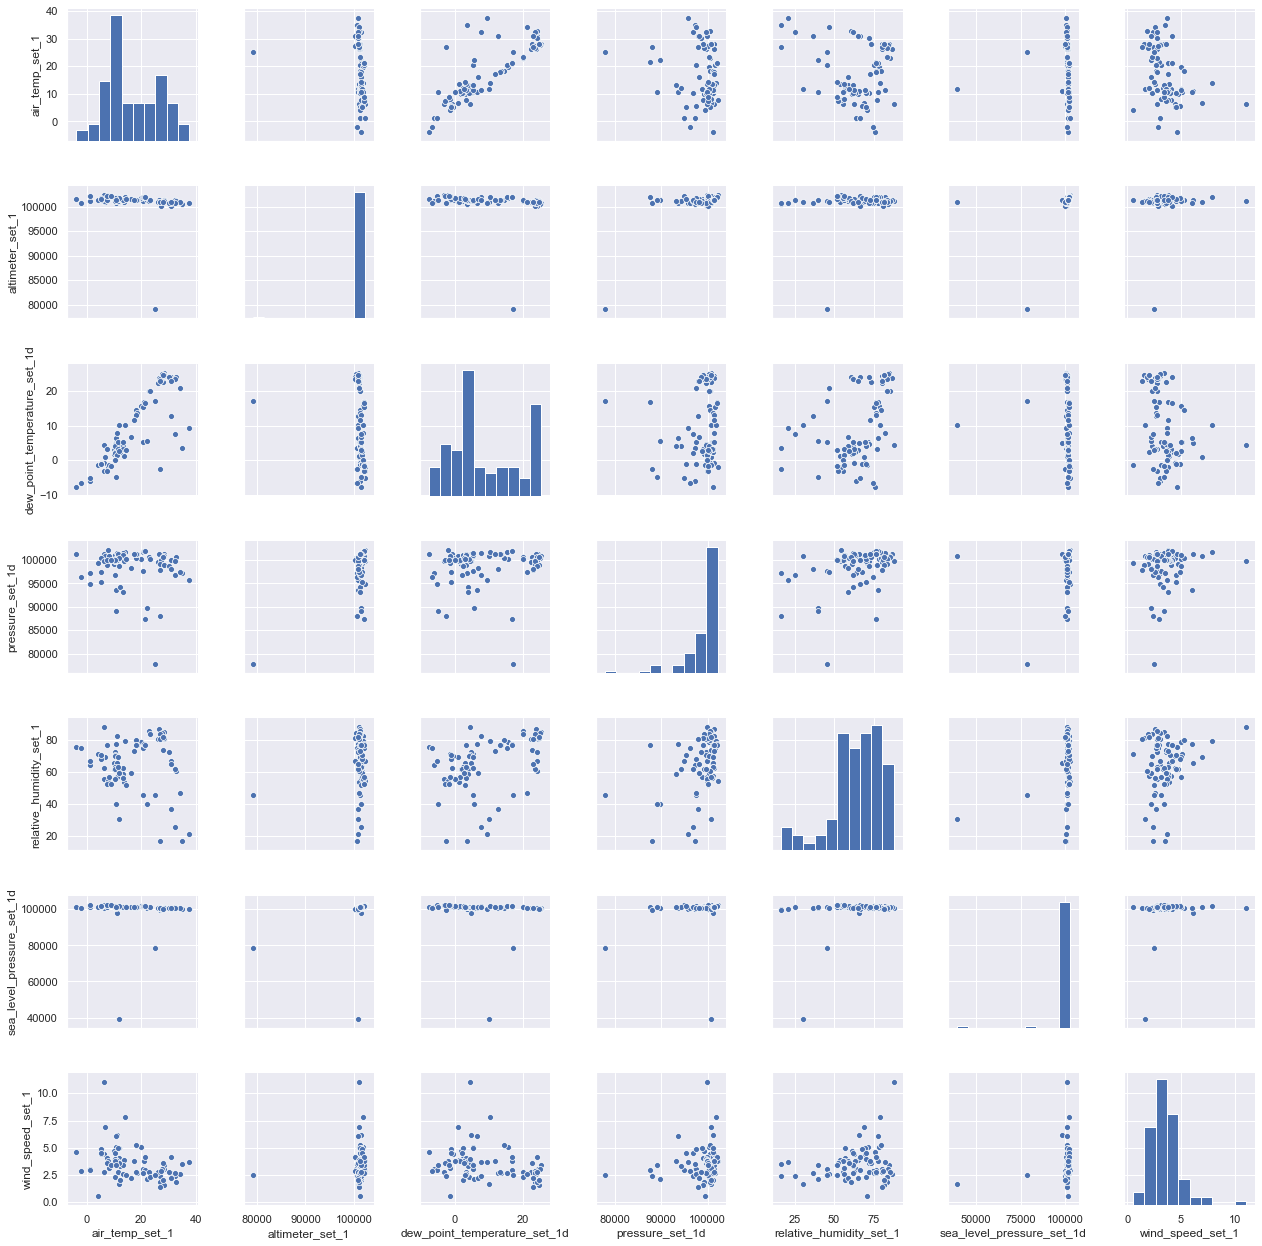

In [25]:
sns.set(style="darkgrid")
sns.pairplot(avg_df )

In [26]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipe = make_pipeline(  StandardScaler()
#                         ,PCA(n_components=7) 
                        )

In [33]:
X = pca_pipe.fit_transform( avg_df.iloc [:,:])
y = avg_df.index
col_abbv = [ i[0:9] for i in avg_df.columns]

In [34]:
#==============================================================================
# Loadings and Scores plot Hoggorm
# Source: https://github.com/olivertomic/hoggorm/tree/master/examples
#==============================================================================
import hoggorm as ho
import hoggormplot as hop

# Get the variable or columns names
data_varNames = list(col_abbv)

# Get the object or row names
data_objNames = list ( avg_df.index )

model = ho.nipalsPCA(arrX=X, Xstand=False, cvType=["KFold", 8], numComp=7)

KFold


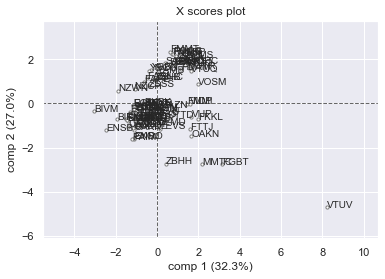

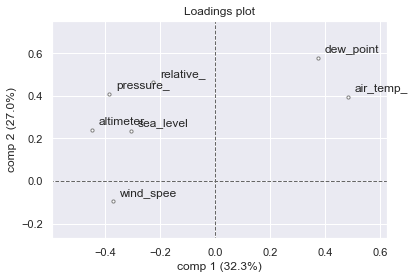

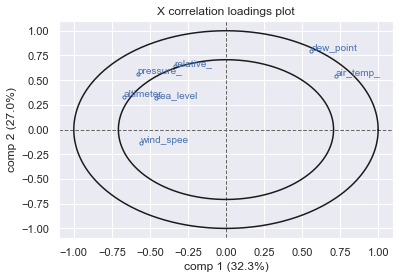

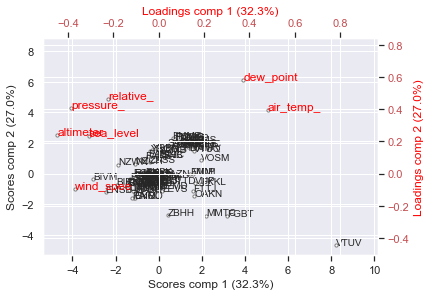

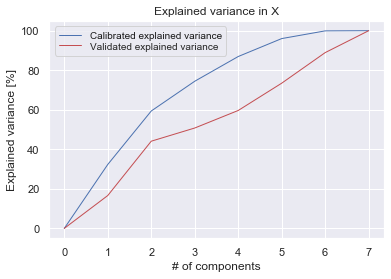

In [36]:
%matplotlib inline
# %matplotlib qt5
hop.plot(model, comp=[1,2], 
         plots=[1,2,3,4,6], 
         objNames=data_objNames, 
         XvarNames=data_varNames)

![](Both.png)

**Conclusion from PCA plots**
- There are two main closely related cluster of weather stations as shown in Scores plot. One cluster has high air temperature and high dew point. Another cluster has larger windspeed.
- Station VTUV is an outlier station as it has relatively larger for both PC1 and PC2 in the scores plot. It probably has a high air temperature and high wind speed.
- We will need at least 4 Principal components to explain around 80% variance of the input data.
- Dew point temperature and air temperature are correlated, sea level pressure and altimeter are also correlated.
- sea level pressure and wind speed explain 50% of the PC1 and PC2 according to the correlation plot.

##  Plotting stations in a world map
- Wanted to plot the text in the map itself. Could manage the legend only.

In [58]:
timezone = [str[str.find("/")+1:] for str in df_stations.TIMEZONE]

In [37]:
df_stations['LONGITUDE'] = df_stations['LONGITUDE'].astype(float)
df_stations['LATITUDE'] = df_stations['LATITUDE'].astype(float)

In [38]:
import geopandas
import descartes 

In [63]:
%matplotlib qt5
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot( color='white', edgecolor='black')

for i in range(df_stations.shape[0]):
    dfnow =  pd.DataFrame(df_stations.loc[i]._values.reshape(1,13) , columns = df_stations.loc[i]._index )
    gdf = geopandas.GeoDataFrame(dfnow
                                 , geometry=geopandas.points_from_xy(dfnow.LONGITUDE
                                                                     , dfnow.LATITUDE))
    gdf.plot(ax=ax, label= gdf['STID'][0]+'-'+timezone[i])
    
plt.legend(prop={'size': 10}, loc='lower left', ncol=2)
# n = list( df_stations['STID'])
# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i], y[i]))
plt.show()

![](OnWorldmap.png)